In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data_science_salaries = pd.read_csv("Resources/Latest_Data_Science_Salaries.csv")
data_science_salaries.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [3]:
job_title_count= data_science_salaries.groupby("Job Title")
job_title_count["Job Title"].count().sort_values(ascending=False)


Job Title
Data Engineer                      702
Data Scientist                     635
Data Analyst                       459
Machine Learning Engineer          300
Analytics Engineer                 132
                                  ... 
Data Engineer 2                      1
Data DevOps Engineer                 1
Cloud Data Architect                 1
Data Science Tech Lead               1
Staff Machine Learning Engineer      1
Name: Job Title, Length: 111, dtype: int64

In [4]:
country_count= data_science_salaries.groupby("Employee Residence")
country_count["Employee Residence"].count().sort_values(ascending=False)

Employee Residence
United States     2453
United Kingdom     245
Canada             101
Germany             58
India               57
                  ... 
Kenya                1
Malta                1
Malaysia             1
Luxembourg           1
Algeria              1
Name: Employee Residence, Length: 83, dtype: int64

In [5]:
expertise_level_count= data_science_salaries.groupby("Expertise Level")
expertise_level_count["Expertise Level"].count().sort_values(ascending=False)

Expertise Level
Expert          2065
Intermediate     797
Junior           292
Director         146
Name: Expertise Level, dtype: int64

In [6]:
expertise_level_dir = data_science_salaries.loc[data_science_salaries["Expertise Level"] == "Director" , :]
expertise_level_dir.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
47,Business Intelligence Engineer,Full-Time,Executive,Director,247500,United States Dollar,United States,247500,United States,Medium,2023
48,Business Intelligence Engineer,Full-Time,Executive,Director,172200,United States Dollar,United States,172200,United States,Medium,2023
59,Data Engineer,Full-Time,Executive,Director,205785,United States Dollar,United Kingdom,205785,United Kingdom,Medium,2023
60,Data Engineer,Full-Time,Executive,Director,123471,United States Dollar,United Kingdom,123471,United Kingdom,Medium,2023
131,Data Engineer,Full-Time,Executive,Director,130002,United States Dollar,United States,130002,United States,Medium,2023
132,Data Engineer,Full-Time,Executive,Director,71908,United States Dollar,United States,71908,United States,Medium,2023
167,Data Engineer,Full-Time,Executive,Director,174500,United States Dollar,United States,174500,United States,Medium,2023
168,Data Engineer,Full-Time,Executive,Director,113000,United States Dollar,United States,113000,United States,Medium,2023
189,Data Scientist,Full-Time,Executive,Director,299500,United States Dollar,United States,299500,United States,Medium,2023
190,Data Scientist,Full-Time,Executive,Director,249600,United States Dollar,United States,249600,United States,Medium,2023


In [7]:
expertise_level_jr = data_science_salaries.loc[data_science_salaries["Expertise Level"] == "Junior" , :]
expertise_level_jr.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
65,AI Programmer,Full-Time,Entry,Junior,40000,United States Dollar,"Korea, Republic of",40000,"Korea, Republic of",Small,2023
100,Research Engineer,Full-Time,Entry,Junior,30000,Euro,France,32390,France,Medium,2023
241,Data Analyst,Full-Time,Entry,Junior,90000,United States Dollar,United States,90000,United States,Medium,2023
242,Data Analyst,Full-Time,Entry,Junior,60000,United States Dollar,United States,60000,United States,Medium,2023
249,Data Analyst,Full-Time,Entry,Junior,40000,British Pound Sterling,United Kingdom,49216,United Kingdom,Medium,2023
250,Data Analyst,Full-Time,Entry,Junior,34000,British Pound Sterling,United Kingdom,41833,United Kingdom,Medium,2023
319,Data Engineer,Full-Time,Entry,Junior,80000,United States Dollar,United States,80000,United States,Medium,2023
320,Data Engineer,Full-Time,Entry,Junior,52500,United States Dollar,United States,52500,United States,Medium,2023
348,Data Analyst,Full-Time,Entry,Junior,55000,Canadian Dollar,Canada,40747,Canada,Large,2023
379,Research Scientist,Full-Time,Entry,Junior,200000,United States Dollar,United States,200000,United States,Medium,2023


In [8]:
title_data_analyst = data_science_salaries.loc[data_science_salaries["Job Title"] == "Data Analyst" , :]
title_data_analyst.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
22,Data Analyst,Full-Time,Senior,Expert,204500,United States Dollar,United States,204500,United States,Medium,2023
23,Data Analyst,Full-Time,Senior,Expert,138900,United States Dollar,United States,138900,United States,Medium,2023
53,Data Analyst,Full-Time,Senior,Expert,169000,United States Dollar,United States,169000,United States,Medium,2023
54,Data Analyst,Full-Time,Senior,Expert,110600,United States Dollar,United States,110600,United States,Medium,2023
75,Data Analyst,Full-Time,Senior,Expert,49200,Euro,Estonia,53120,Estonia,Medium,2023
76,Data Analyst,Full-Time,Senior,Expert,36000,Euro,Estonia,38868,Estonia,Medium,2023
96,Data Analyst,Full-Time,Senior,Expert,120350,United States Dollar,United States,120350,United States,Medium,2023
97,Data Analyst,Full-Time,Senior,Expert,74400,United States Dollar,United States,74400,United States,Medium,2023
127,Data Analyst,Full-Time,Senior,Expert,168000,United States Dollar,United States,168000,United States,Large,2023
128,Data Analyst,Full-Time,Senior,Expert,78400,United States Dollar,United States,78400,United States,Large,2023


In [9]:
job_title_clean = data_science_salaries.loc[data_science_salaries["Job Title"].isin(["Data Engineer",
                                            "Data Scientist", "Data Analyst", "Machine Learning Engineer",
                                            "Analytics Engineer"])]
job_title_clean

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3289,Machine Learning Engineer,Full-Time,Senior,Expert,40000,Euro,Croatia,45618,Croatia,Small,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [10]:
salary_by_job_title = job_title_clean.groupby("Job Title")["Salary in USD"]
salary_by_job_title

In [11]:
# Collect the average salary for each job title
average_salary_by_job_title = job_title_clean.groupby("Job Title")["Salary in USD"].mean()
average_salary_by_job_title

Job Title
Analytics Engineer           154258.962121
Data Analyst                 109500.376906
Data Engineer                142033.874644
Data Scientist               141886.163780
Machine Learning Engineer    167249.513333
Name: Salary in USD, dtype: float64

In [12]:
average_salary_by_year_job = job_title_clean.groupby(["Year", "Job Title"])["Salary in USD"].mean().reset_index()
average_salary_by_year_job

,Year,Job Title,Salary in USD
0,2020,Data Analyst,60911.166667
1,2020,Data Engineer,85301.384615
2,2020,Data Scientist,85970.523810
3,2020,Machine Learning Engineer,145904.500000
4,2021,Data Analyst,78258.500000
5,2021,Data Engineer,91636.971429
6,2021,Data Scientist,79366.230769
7,2021,Machine Learning Engineer,74611.222222
8,2022,Analytics Engineer,138697.425532
9,2022,Data Analyst,104739.781457


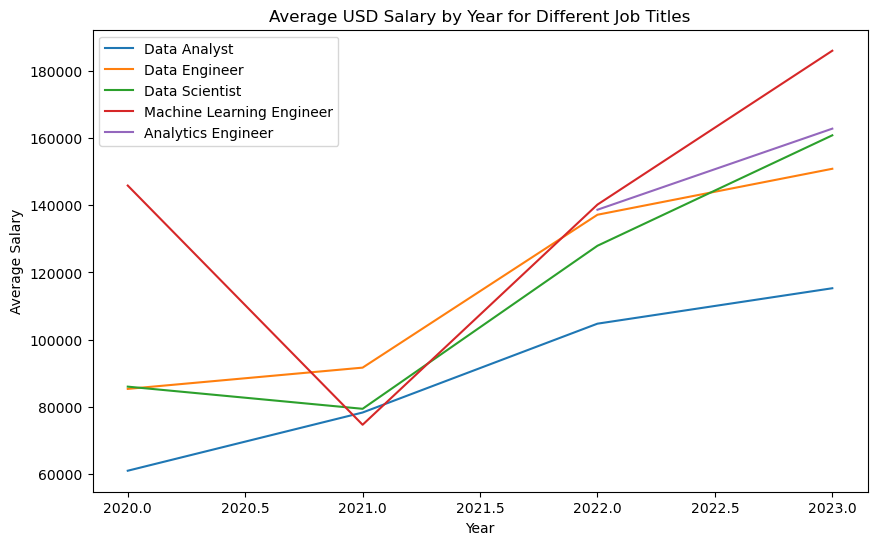

In [13]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Loop through each job title and plot a line for each one
for job_title in average_salary_by_year_job["Job Title"].unique():
    job_data = average_salary_by_year_job[average_salary_by_year_job["Job Title"] == job_title]
    plt.plot(job_data["Year"], job_data["Salary in USD"], label=job_title)

plt.xlabel("Year")  # Set the x-axis label
plt.ylabel("Average Salary")  # Set the y-axis label
plt.title("Average USD Salary by Year for Different Job Titles")  # Set the title of the graph
plt.legend()  # Show the legend

plt.show()  # Display the graph

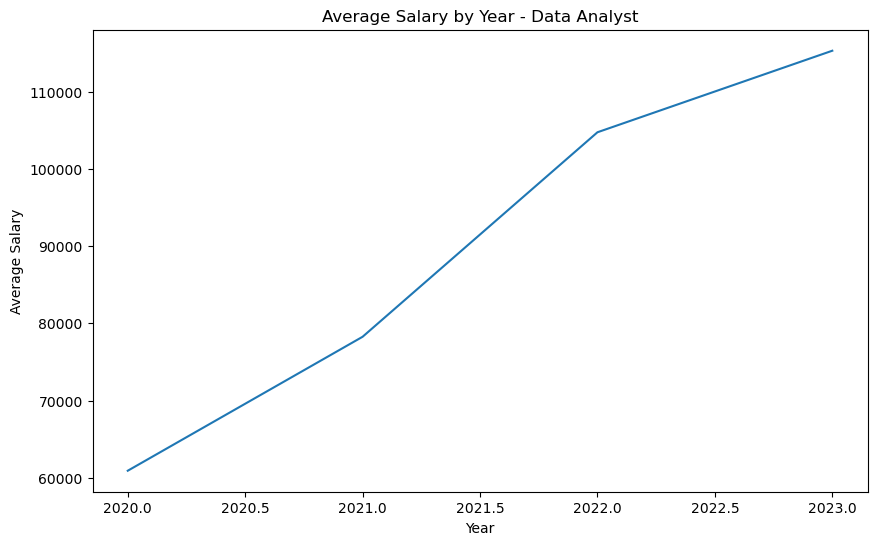

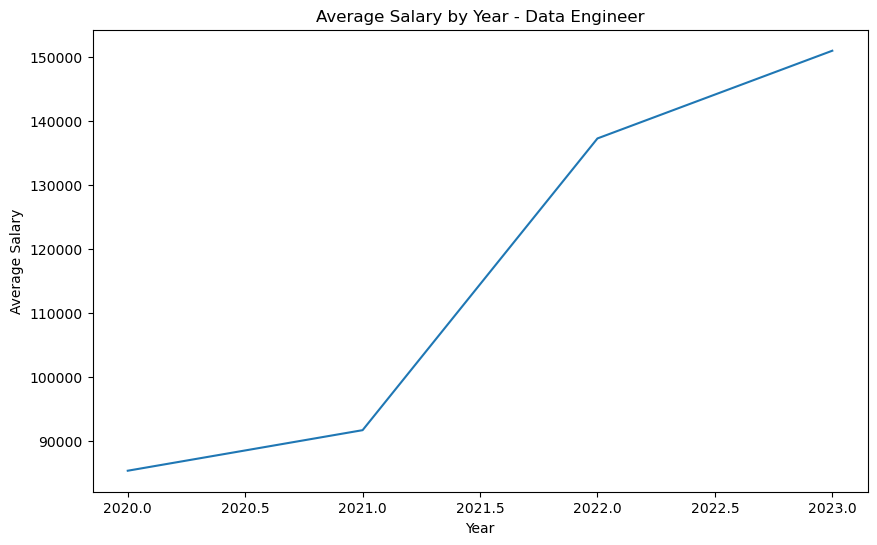

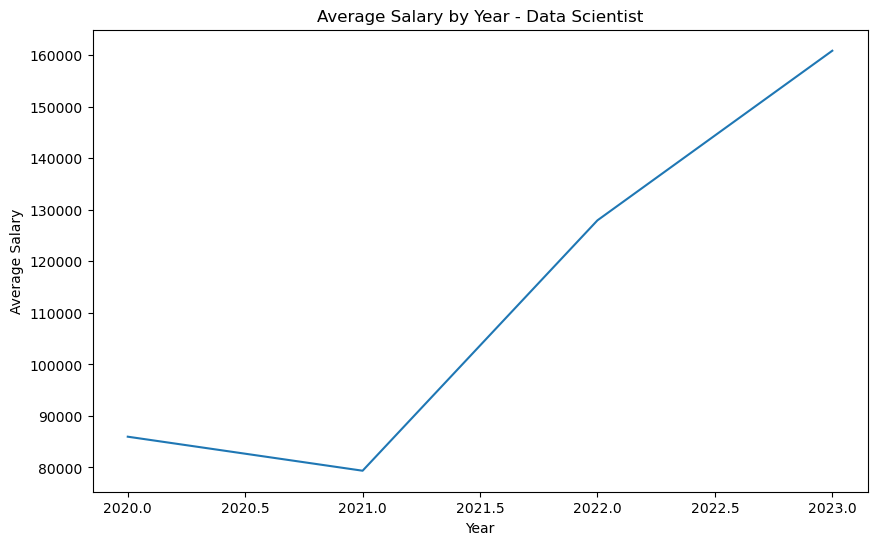

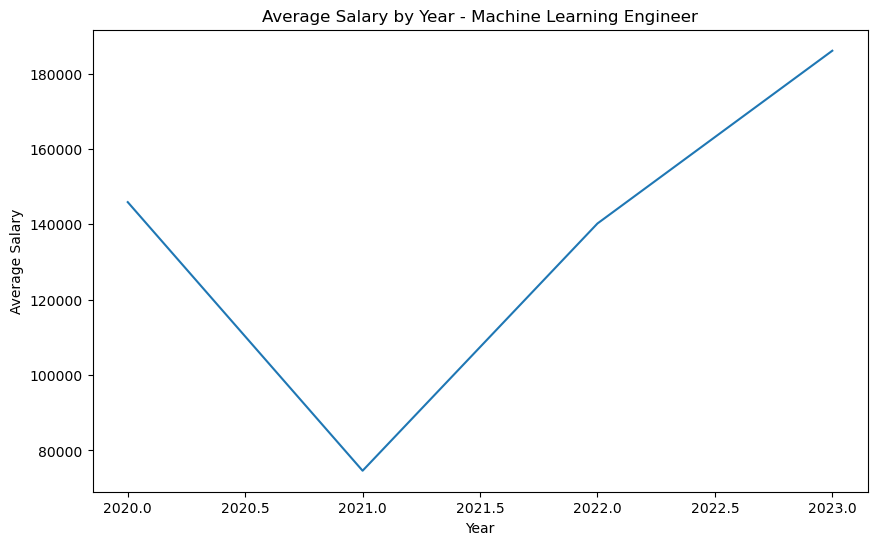

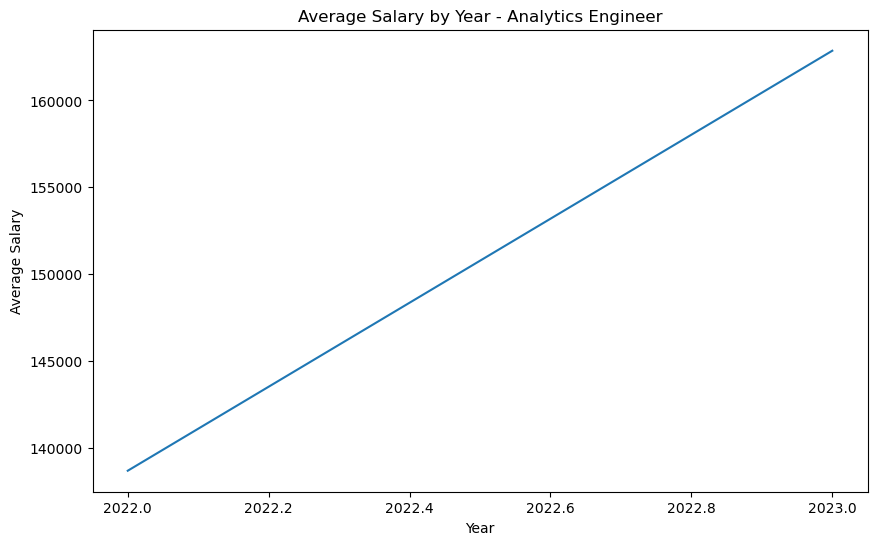

In [14]:
# Get the unique job titles
job_titles = average_salary_by_year_job["Job Title"].unique()

# Create a separate plot for each job title
for job_title in job_titles:
    # Filter the data for the specific job title
    job_data = average_salary_by_year_job[average_salary_by_year_job["Job Title"] == job_title]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(job_data["Year"], job_data["Salary in USD"])
    plt.xlabel("Year")
    plt.ylabel("Average Salary")
    plt.title(f"Average Salary by Year - {job_title}")
    plt.show()

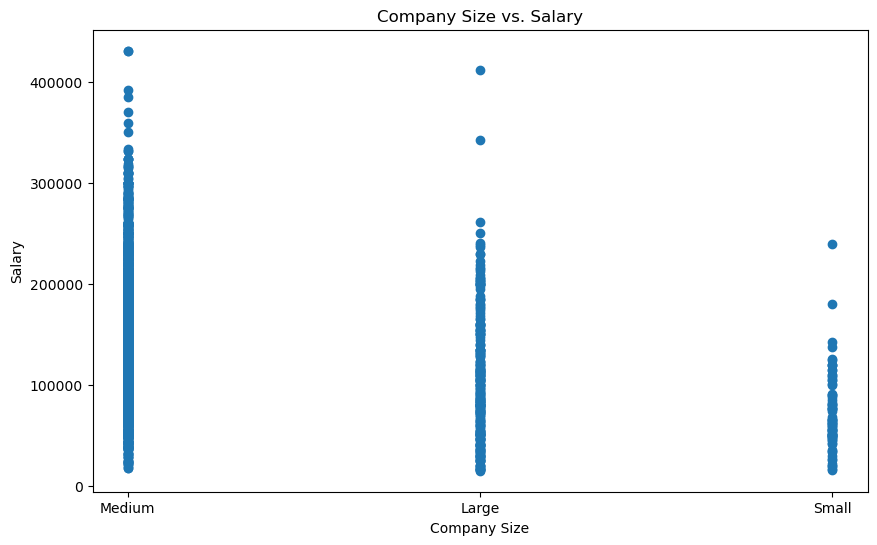

In [29]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(job_title_clean['Company Size'], job_title_clean['Salary in USD'])
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.title('Company Size vs. Salary')

plt.show()

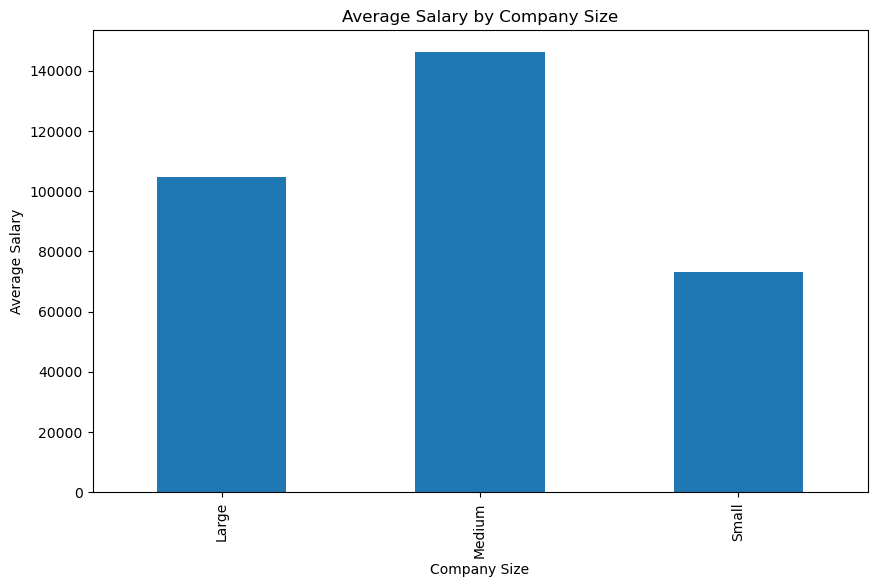

In [35]:
average_salary_by_size = job_title_clean.groupby('Company Size')['Salary in USD'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
average_salary_by_size.plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')

plt.show()

In [17]:
average_salary_by_year_job = job_title_clean.groupby(["Year", "Job Title"])["Salary in USD"].mean().reset_index()

In [18]:
x = average_salary_by_year_job["Year"].values.reshape(-1, 1)
y = average_salary_by_year_job["Salary in USD"].values

In [19]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [20]:
future_years = range(2023, 2030)  # Example: predicting for the years 2023 to 2029
future_x = pd.DataFrame(future_years, columns=["Year"])
future_predictions = regressor.predict(future_x)

C:\Users\Roses\anaconda3\envs\dev\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


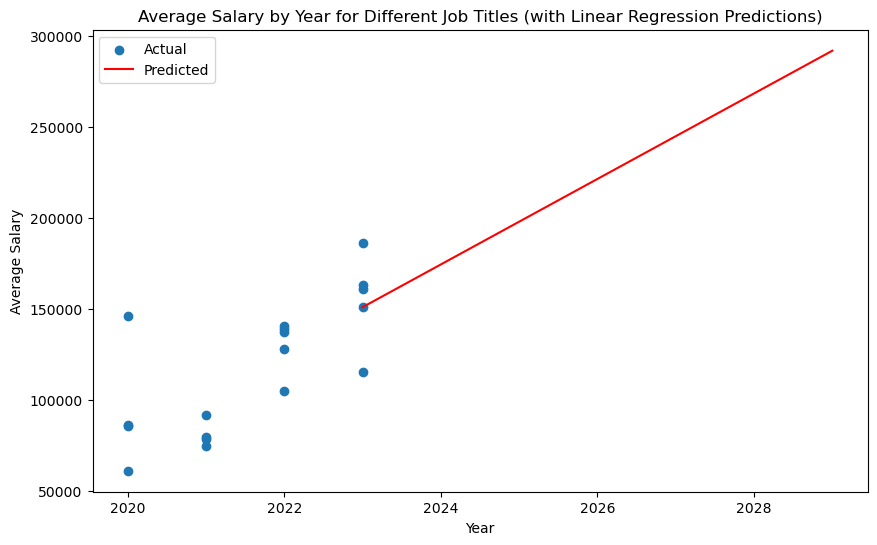

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(average_salary_by_year_job["Year"], average_salary_by_year_job["Salary in USD"], label="Actual")
plt.plot(future_years, future_predictions, color="red", label="Predicted")

plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.title("Average Salary by Year for Different Job Titles (with Linear Regression Predictions)")
plt.legend()

plt.show()

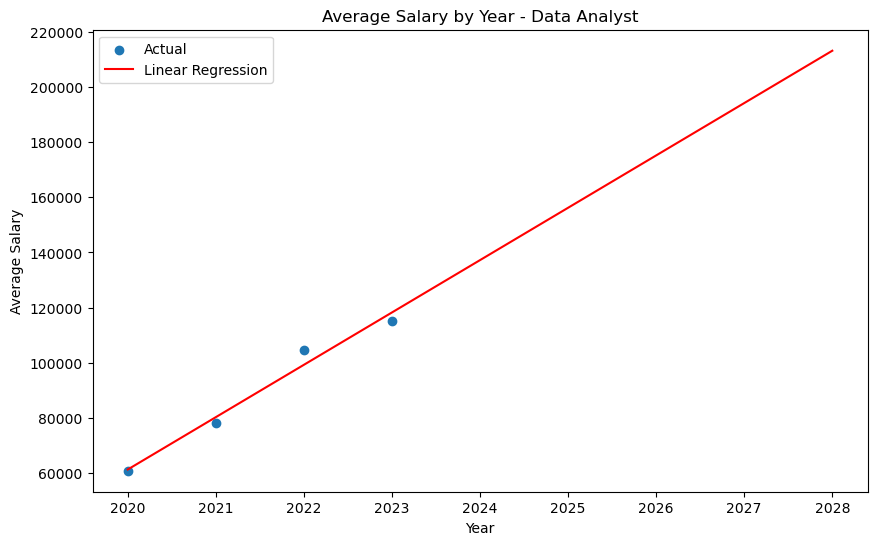

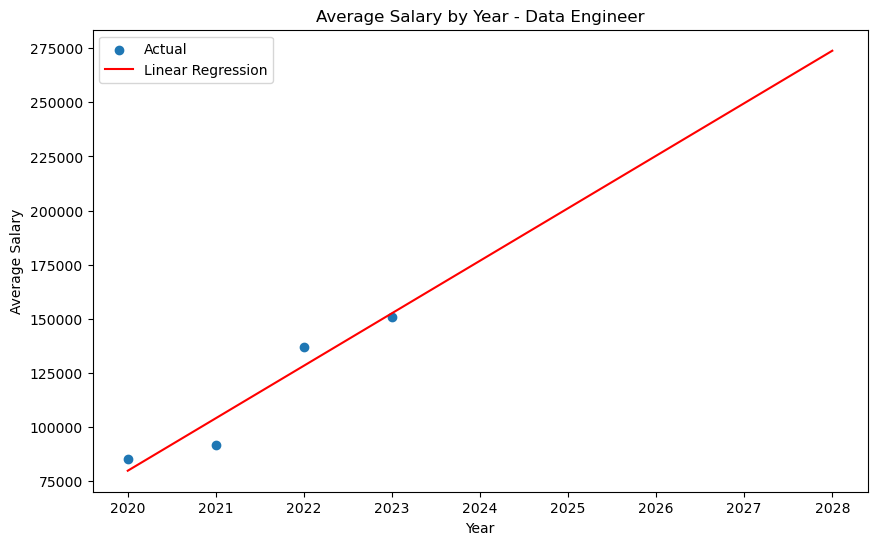

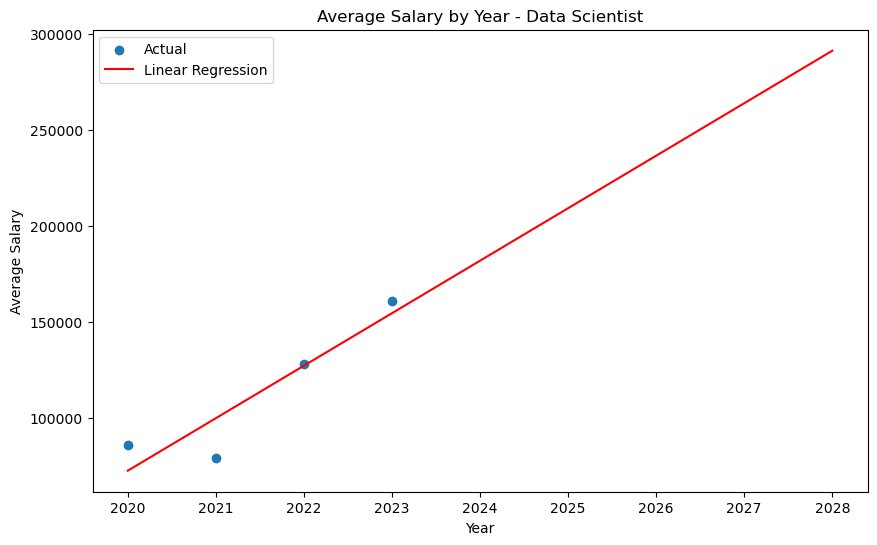

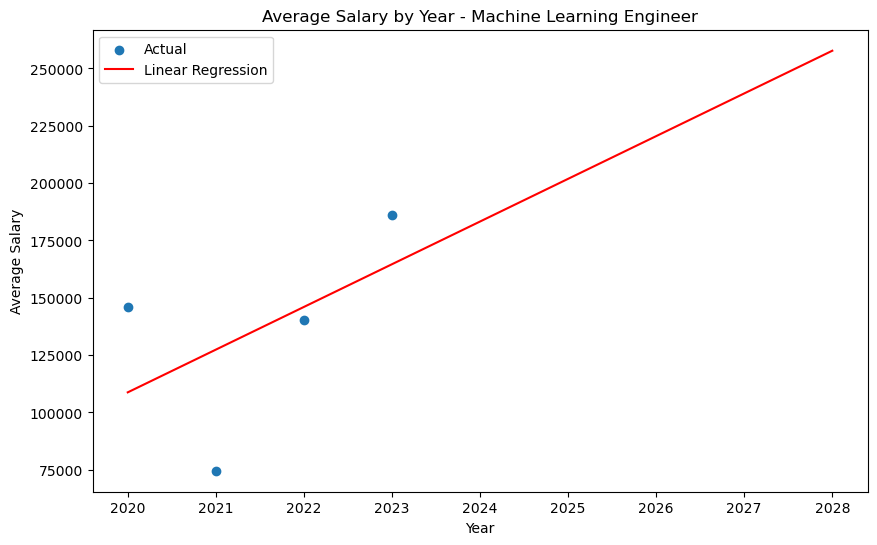

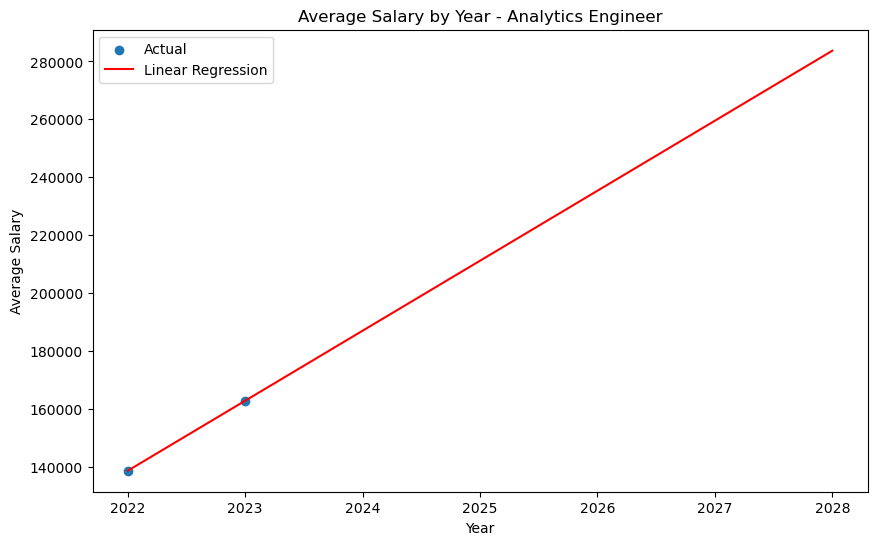

In [42]:
# Calculate the average salary by year for each job title
average_salary_by_year_job = job_title_clean.groupby(["Year", "Job Title"])["Salary in USD"].mean().reset_index()

# Get unique job titles
job_titles = average_salary_by_year_job["Job Title"].unique()

# Create a separate plot with linear regression for each job title
for job_title in job_titles:
    # Filter the data for the specific job title
    job_data = average_salary_by_year_job[average_salary_by_year_job["Job Title"] == job_title]

    # Extract the features (years) and target (average salary)
    x = job_data["Year"].values.reshape(-1, 1)
    y = job_data["Salary in USD"].values

    # Create and fit a linear regression model
    regressor = LinearRegression()
    regressor.fit(x, y)

    # Generate predictions for the future years
    future_years = np.arange(min(x), max(x) + 6)  # Predicting for the next 5 years
    future_x = future_years.reshape(-1, 1)
    future_predictions = regressor.predict(future_x)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.scatter(job_data["Year"], job_data["Salary in USD"], label="Actual")
    plt.plot(future_years, future_predictions, color="red", label="Linear Regression")

    plt.xlabel("Year")
    plt.ylabel("Average Salary")
    plt.title(f"Average Salary by Year - {job_title}")
    plt.legend()
    plt.show()

In [23]:
average_salary_by_country = job_title_clean.groupby(["Company Location", "Job Title"])["Salary in USD"].mean().reset_index()
average_salary_by_country

,Company Location,Job Title,Salary in USD
0,Algeria,Data Scientist,100000.000000
1,Andorra,Data Scientist,50745.000000
2,Argentina,Data Analyst,50000.000000
3,Argentina,Data Engineer,65000.000000
4,Armenia,Machine Learning Engineer,50000.000000
...,...,...,...
103,United States,Analytics Engineer,158376.788991
104,United States,Data Analyst,117389.534435
105,United States,Data Engineer,157686.492832
106,United States,Data Scientist,160815.621277


In [24]:
demand_by_position_country = average_salary_by_country.groupby(["Job Title", "Company Location"]).count()
demand_by_position_country

Salary in USD
Job Title                 Company Location                   
Analytics Engineer        Brazil                            1
                          Canada                            1
                          Nigeria                           1
                          United Kingdom                    1
                          United States                     1
...                                                       ...
Machine Learning Engineer Spain                             1
                          Switzerland                       1
                          United Arab Emirates              1
                          United Kingdom                    1
                          United States                     1

[108 rows x 1 columns]

In [25]:
salary_by_position_country = average_salary_by_country.groupby(["Job Title", "Company Location"])["Salary in USD"].mean()
salary_by_position_country

Job Title                  Company Location    
Analytics Engineer         Brazil                   63000.000000
                           Canada                  112000.000000
                           Nigeria                  50000.000000
                           United Kingdom          149950.722222
                           United States           158376.788991
                                                       ...      
Machine Learning Engineer  Spain                    47282.000000
                           Switzerland              80616.500000
                           United Arab Emirates     92500.000000
                           United Kingdom          119914.357143
                           United States           188153.202765
Name: Salary in USD, Length: 108, dtype: float64

C:\Users\Roses\AppData\Local\Temp\ipykernel_32484\1448062858.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


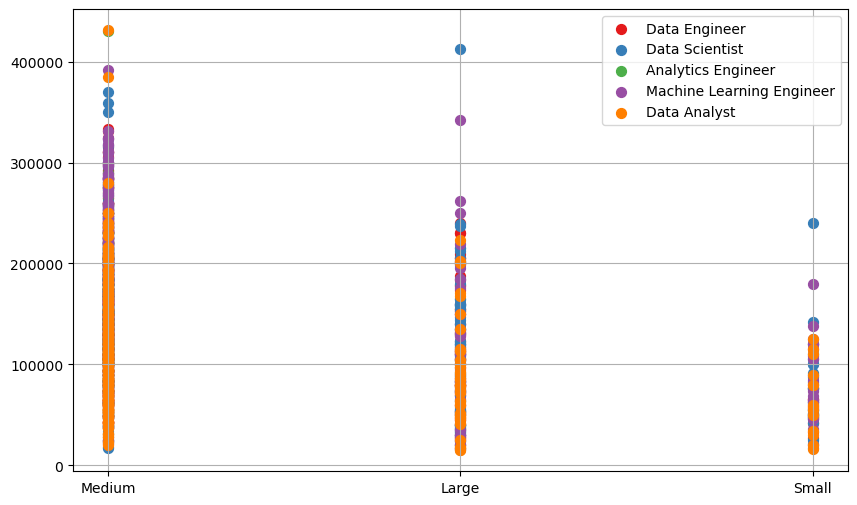

In [40]:
plt.figure(figsize=(10, 6))

# Choose a color map
cmap = plt.cm.get_cmap('Set1')

# Iterate over unique job titles and assign a color based on the index
for i, job_title in enumerate(job_title_clean['Job Title'].unique()):
    job_data = job_title_clean[job_title_clean['Job Title'] == job_title]
    plt.scatter(job_data['Company Size'], job_data['Salary in USD'], label=job_title, s=50, c=[cmap(i)])
    
plt.legend(loc='upper right')
plt.grid(True)

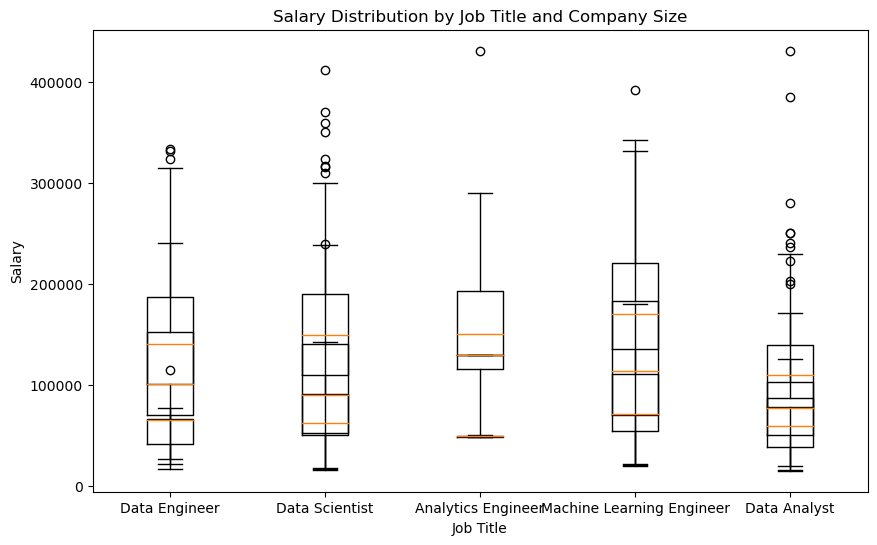

In [38]:
# Create a list of unique company sizes
company_sizes = job_title_clean['Company Size'].unique()

# Create subplots for each job title
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each job title
for i, job_title in enumerate(job_titles):
    # Filter data for the specific job title
    job_title_data = job_title_clean[job_title_clean['Job Title'] == job_title]

    # Create a list to store salary data for each company size
    salary_data = []
    # Iterate over each company size
    for company_size in company_sizes:
        # Filter data for the specific company size and job title
        company_size_data = job_title_data[job_title_data['Company Size'] == company_size]
        salary_data.append(company_size_data['Salary in USD'])

    # Create a box plot for the current job title
    positions = [i + 1] * len(company_sizes)
    ax.boxplot(salary_data, positions=positions, widths=0.3)

# Set x-axis labels and tick positions
ax.set_xticks(range(1, len(job_titles) + 1))
ax.set_xticklabels(job_titles)

plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Distribution by Job Title and Company Size')

plt.show()